In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
for fontInfo in fm.fontManager.ttflist :
  if 'Nanum' in fontInfo.name :
    print(fontInfo.name+ " = " + fontInfo.fname)

Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm
fm._rebuild()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/project/서울데이터.csv')
data

,date,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,서울약령시 한의약박물관,세종대왕기념관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,롯데월드,서울스카이,아쿠아리움
0,201101,-7.183871,-10.522581,966.290323,-3.406452,1392.838710,4.988750,1.112500,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2.796774,2415.387097,229.354839,-15.341935,35.129032,1230.322581,53.829032,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,7.048387,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,141183,11486,17644,43677,72313,92135,234587,260272,3204.0,NaN,1747,34551,18407,10128.0,736,13486.0,494730.0,NaN,NaN
1,201102,1.221429,-2.460714,706.785714,5.864286,1441.535714,12.330000,9.700000,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2.553571,2210.250000,190.357143,-7.639286,32.000000,1390.214286,55.228571,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,5.950000,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,230814,17078,35708,73330,135771,132920,171376,224691,2182.0,NaN,1943,20934,14387,15695.0,1730,18578.0,506321.0,NaN,NaN
2,201103,3.616129,-0.119355,1033.548387,8.345161,1464.419355,4.872857,2.085714,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,3.406452,2950.032258,246.451613,-6.654839,25.258065,1398.032258,51.112903,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,7.748387,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,228276,22238,29856,78705,105735,64869,260687,184565,3303.0,NaN,3000,18641,47554,11468.0,2085,22696.0,288170.0,NaN,NaN
3,201104,10.720000,6.773333,773.433333,15.596667,1345.500000,7.606364,10.009091,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,3.243333,2805.733333,226.000000,0.300000,28.666667,1245.600000,54.240000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,6.736667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,349368,30470,70101,129150,176991,85548,56024,240861,3042.0,NaN,8029,24078,66009,11577.0,5212,43184.0,446939.0,NaN,NaN
4,201105,17.925806,13.570968,953.387097,22.983871,1397.129032,7.137692,4.107692,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2.832258,2446.709677,156.129032,7.900000,32.161290,1296.290323,56.416129,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,5.819355,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,438567,56106,78017,151833,188983,103100,279310,307969,2644.0,NaN,17108,25593,72267,9507.0,6201,44836.0,474422.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
data.columns

Index(['date', '평균 기온(°C)', '최저 기온(°C)', '최저 기온 시각(hhmi)', '최고 기온(°C)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다 풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조 시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을',
       '덕수궁', '서울시립미술관 본관', '국립중앙박물관', '서울약령시 한의약박물관', '세종대왕기념관',
       

# 월 데이터 추가하기

In [ ]:
data['month'] = data['date'].apply(lambda x : int(str(x)[4:]))
data

,date,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,서울약령시 한의약박물관,세종대왕기념관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,롯데월드,서울스카이,아쿠아리움,month
0,201101,-7.183871,-10.522581,966.290323,-3.406452,1392.838710,4.988750,1.112500,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2.796774,2415.387097,229.354839,-15.341935,35.129032,1230.322581,53.829032,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,7.048387,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,141183,11486,17644,43677,72313,92135,234587,260272,3204.0,NaN,1747,34551,18407,10128.0,736,13486.0,494730.0,NaN,NaN,1
1,201102,1.221429,-2.460714,706.785714,5.864286,1441.535714,12.330000,9.700000,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2.553571,2210.250000,190.357143,-7.639286,32.000000,1390.214286,55.228571,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,5.950000,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,230814,17078,35708,73330,135771,132920,171376,224691,2182.0,NaN,1943,20934,14387,15695.0,1730,18578.0,506321.0,NaN,NaN,2
2,201103,3.616129,-0.119355,1033.548387,8.345161,1464.419355,4.872857,2.085714,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,3.406452,2950.032258,246.451613,-6.654839,25.258065,1398.032258,51.112903,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,7.748387,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,228276,22238,29856,78705,105735,64869,260687,184565,3303.0,NaN,3000,18641,47554,11468.0,2085,22696.0,288170.0,NaN,NaN,3
3,201104,10.720000,6.773333,773.433333,15.596667,1345.500000,7.606364,10.009091,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,3.243333,2805.733333,226.000000,0.300000,28.666667,1245.600000,54.240000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,6.736667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,349368,30470,70101,129150,176991,85548,56024,240861,3042.0,NaN,8029,24078,66009,11577.0,5212,43184.0,446939.0,NaN,NaN,4
4,201105,17.925806,13.570968,953.387097,22.983871,1397.129032,7.137692,4.107692,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2.832258,2446.709677,156.129032,7.900000,32.161290,1296.290323,56.416129,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,5.819355,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,438567,56106,78017,151833,188983,103100,279310,307969,2644.0,NaN,17108,25593,72267,9507.0,6201,44836.0,474422.0,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 계절 데이터 추가하기

In [ ]:
data.loc[(data['month'] == 12 )|(data['month'] == 1 )|(data['month'] == 2 ), 'season'] = 4
data.loc[(data['month'] == 3 )|(data['month'] == 4 )|(data['month'] == 5 ), 'season'] = 1
data.loc[(data['month'] == 6 )|(data['month'] == 7 )|(data['month'] == 8 ), 'season'] = 2
data.loc[(data['month'] == 9 )|(data['month'] == 10 )|(data['month'] == 11 ), 'season'] = 3
data['season'] = data.season.astype('int64')
data

,date,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,서울약령시 한의약박물관,세종대왕기념관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,롯데월드,서울스카이,아쿠아리움,month,season
0,201101,-7.183871,-10.522581,966.290323,-3.406452,1392.838710,4.988750,1.112500,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2.796774,2415.387097,229.354839,-15.341935,35.129032,1230.322581,53.829032,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,7.048387,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,141183,11486,17644,43677,72313,92135,234587,260272,3204.0,NaN,1747,34551,18407,10128.0,736,13486.0,494730.0,NaN,NaN,1,4
1,201102,1.221429,-2.460714,706.785714,5.864286,1441.535714,12.330000,9.700000,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2.553571,2210.250000,190.357143,-7.639286,32.000000,1390.214286,55.228571,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,5.950000,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,230814,17078,35708,73330,135771,132920,171376,224691,2182.0,NaN,1943,20934,14387,15695.0,1730,18578.0,506321.0,NaN,NaN,2,4
2,201103,3.616129,-0.119355,1033.548387,8.345161,1464.419355,4.872857,2.085714,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,3.406452,2950.032258,246.451613,-6.654839,25.258065,1398.032258,51.112903,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,7.748387,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,228276,22238,29856,78705,105735,64869,260687,184565,3303.0,NaN,3000,18641,47554,11468.0,2085,22696.0,288170.0,NaN,NaN,3,1
3,201104,10.720000,6.773333,773.433333,15.596667,1345.500000,7.606364,10.009091,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,3.243333,2805.733333,226.000000,0.300000,28.666667,1245.600000,54.240000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,6.736667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,349368,30470,70101,129150,176991,85548,56024,240861,3042.0,NaN,8029,24078,66009,11577.0,5212,43184.0,446939.0,NaN,NaN,4,1
4,201105,17.925806,13.570968,953.387097,22.983871,1397.129032,7.137692,4.107692,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2.832258,2446.709677,156.129032,7.900000,32.161290,1296.290323,56.416129,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,5.819355,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,438567,56106,78017,151833,188983,103100,279310,307969,2644.0,NaN,17108,25593,72267,9507.0,6201,44836.0,474422.0,NaN,NaN,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
# 계절데이터 더미화 하기
season = pd.get_dummies(data['season'])
season = season.rename(columns = {1: '봄', 2 : '여름', 3: '가을', 4:'겨울'})
data = pd.concat([data, season], axis = 1)
data 

,date,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,서울약령시 한의약박물관,세종대왕기념관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,롯데월드,서울스카이,아쿠아리움,month,season,봄,여름,가을,겨울
0,201101,-7.183871,-10.522581,966.290323,-3.406452,1392.838710,4.988750,1.112500,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2.796774,2415.387097,229.354839,-15.341935,35.129032,1230.322581,53.829032,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,7.048387,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,141183,11486,17644,43677,72313,92135,234587,260272,3204.0,NaN,1747,34551,18407,10128.0,736,13486.0,494730.0,NaN,NaN,1,4,0,0,0,1
1,201102,1.221429,-2.460714,706.785714,5.864286,1441.535714,12.330000,9.700000,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2.553571,2210.250000,190.357143,-7.639286,32.000000,1390.214286,55.228571,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,5.950000,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,230814,17078,35708,73330,135771,132920,171376,224691,2182.0,NaN,1943,20934,14387,15695.0,1730,18578.0,506321.0,NaN,NaN,2,4,0,0,0,1
2,201103,3.616129,-0.119355,1033.548387,8.345161,1464.419355,4.872857,2.085714,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,3.406452,2950.032258,246.451613,-6.654839,25.258065,1398.032258,51.112903,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,7.748387,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,228276,22238,29856,78705,105735,64869,260687,184565,3303.0,NaN,3000,18641,47554,11468.0,2085,22696.0,288170.0,NaN,NaN,3,1,1,0,0,0
3,201104,10.720000,6.773333,773.433333,15.596667,1345.500000,7.606364,10.009091,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,3.243333,2805.733333,226.000000,0.300000,28.666667,1245.600000,54.240000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,6.736667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,349368,30470,70101,129150,176991,85548,56024,240861,3042.0,NaN,8029,24078,66009,11577.0,5212,43184.0,446939.0,NaN,NaN,4,1,1,0,0,0
4,201105,17.925806,13.570968,953.387097,22.983871,1397.129032,7.137692,4.107692,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2.832258,2446.709677,156.129032,7.900000,32.161290,1296.290323,56.416129,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,5.819355,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,438567,56106,78017,151833,188983,103100,279310,307969,2644.0,NaN,17108,25593,72267,9507.0,6201,44836.0,474422.0,NaN,NaN,5,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
data = data.drop(['서울약령시 한의약박물관','세종대왕기념관', '롯데월드', '서울스카이', '아쿠아리움'], axis = 1)
data  # nan값 있는거 추가적으로 제외

,date,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,month,season,봄,여름,가을,겨울
0,201101,-7.183871,-10.522581,966.290323,-3.406452,1392.838710,4.988750,1.112500,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2.796774,2415.387097,229.354839,-15.341935,35.129032,1230.322581,53.829032,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,7.048387,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,141183,11486,17644,43677,72313,92135,234587,260272,1747,34551,18407,10128.0,736,13486.0,1,4,0,0,0,1
1,201102,1.221429,-2.460714,706.785714,5.864286,1441.535714,12.330000,9.700000,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2.553571,2210.250000,190.357143,-7.639286,32.000000,1390.214286,55.228571,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,5.950000,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,230814,17078,35708,73330,135771,132920,171376,224691,1943,20934,14387,15695.0,1730,18578.0,2,4,0,0,0,1
2,201103,3.616129,-0.119355,1033.548387,8.345161,1464.419355,4.872857,2.085714,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,3.406452,2950.032258,246.451613,-6.654839,25.258065,1398.032258,51.112903,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,7.748387,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,228276,22238,29856,78705,105735,64869,260687,184565,3000,18641,47554,11468.0,2085,22696.0,3,1,1,0,0,0
3,201104,10.720000,6.773333,773.433333,15.596667,1345.500000,7.606364,10.009091,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,3.243333,2805.733333,226.000000,0.300000,28.666667,1245.600000,54.240000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,6.736667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,349368,30470,70101,129150,176991,85548,56024,240861,8029,24078,66009,11577.0,5212,43184.0,4,1,1,0,0,0
4,201105,17.925806,13.570968,953.387097,22.983871,1397.129032,7.137692,4.107692,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2.832258,2446.709677,156.129032,7.900000,32.161290,1296.290323,56.416129,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,5.819355,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,438567,56106,78017,151833,188983,103100,279310,307969,17108,25593,72267,9507.0,6201,44836.0,5,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
data[['경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을', '덕수궁', '서울시립미술관 본관', '국립중앙박물관',
       '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관', '헌릉ㆍ인릉',
       '선릉·정릉' ]].isna().sum() # 트릭아이미술관, 선릉/정릉 은 결측치가 얼마 없기때문에 사용하기로 결정.

경복궁                   0
종묘                    0
창경궁                   0
창덕궁                   0
남산골한옥마을               0
덕수궁                   0
서울시립미술관 본관            0
국립중앙박물관               0
태릉 ·  강릉 · 조선왕릉전시관    0
서대문자연사박물관             0
서대문형무소역사관             0
트릭아이미술관               2
헌릉ㆍ인릉                 0
선릉·정릉                 3
dtype: int64

# 관광지별로 데이터 프레임을 만들어서 모델링 하기

In [ ]:
tour_list = ['경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을',
       '덕수궁', '서울시립미술관 본관', '국립중앙박물관',
       '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관', '헌릉ㆍ인릉',
       '선릉·정릉']

def tour(tour) :
  df = pd.merge(data[['date','평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '봄', '여름', '가을', '겨울']],data[['date', tour]], how = 'left', on = 'date')
  df = df.drop('date', axis = 1)
  df = df.dropna(axis = 0)
  df = df.rename(columns = {df.columns[-1] : '관광객수'})
  return df

경복궁 = tour('경복궁')
종묘 = tour('종묘')
창경궁 = tour('창경궁')
창덕궁 = tour('창덕궁')
남산골한옥마을 = tour('남산골한옥마을')
덕수궁 = tour('덕수궁')
서울시립미술관 = tour('서울시립미술관 본관')
국립중앙박물관 = tour('국립중앙박물관')
태릉 = tour('태릉 ·  강릉 · 조선왕릉전시관')
서대문자연사박물관 = tour('서대문자연사박물관')
서대문형무소역사관 = tour('서대문형무소역사관')
트릭아이미술관 = tour('트릭아이미술관')
헌릉 = tour('헌릉ㆍ인릉')
선릉 = tour('선릉·정릉')

경복궁['경복궁'] = 0
종묘['종묘'] = 0
창경궁['창경궁'] = 0
창덕궁['창덕궁'] = 0
남산골한옥마을['남산골한옥마을'] = 0
덕수궁['덕수궁'] = 0
서울시립미술관['서울시립미술관'] = 0
국립중앙박물관['국립중앙박물관'] = 0
태릉['태릉'] = 0
서대문자연사박물관['서대문자연사박물관'] = 0
서대문형무소역사관['서대문형무소역사관'] = 0
트릭아이미술관['트릭아이미술관'] = 0
헌릉['헌릉ㆍ인릉'] = 0
선릉['선릉·정릉'] = 0

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Xgboost' : XGBRegressor(),
    'lightgbm' : LGBMRegressor(),
    'LinearRegression' : LinearRegression()
}
data_list = [경복궁, 종묘, 창경궁, 창덕궁, 남산골한옥마을, 덕수궁, 서울시립미술관, 국립중앙박물관, 
             태릉, 서대문자연사박물관, 서대문형무소역사관, 
             트릭아이미술관, 헌릉, 선릉]

for i in data_list :
  print(i.columns[-1])
  for key, regressor in models.items() :
    X_train, X_test, y_train, y_test = train_test_split(i.drop(['관광객수', i.columns[-1]], axis = 1), i['관광객수'], test_size = 0.2, random_state = 42)
    model = regressor
    model.fit(X_train, y_train)
    print(key)
    print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
    y_pred = model.predict(X_test)
    print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('r2 : ', round(r2_score(y_test,y_pred), 4))
    print('-'*100)
  print('#'*100)

경복궁
[07:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  63.690000000000005 %
rmse :  97773.4227172627
r2 :  0.6369
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  60.62 %
rmse :  101829.3825490538
r2 :  0.6062
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  42.64 %
rmse :  122895.10090139777
r2 :  0.4264
----------------------------------------------------------------------------------------------------
####################################################################################################
종묘
[07:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  49.76 %
rmse :  13972.746382940873
r2 :  0.4976
---------------------------------------------------------------

# Summary

In [ ]:
import statsmodels.api as sm

for i in data_list :
  print(i.columns[-1])
  X = i.drop(['관광객수', i.columns[-1]], axis = 1)
  y = i['관광객수']

  X_constant = sm.add_constant(X)
  model = sm.OLS(y, X_constant)
  lin_reg = model.fit()
  print(lin_reg.summary())
  print('@'*100)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


경복궁
                            OLS Regression Results                            
Dep. Variable:                   관광객수   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     18.23
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.84e-18
Time:                        07:30:15   Log-Likelihood:                -1362.8
No. Observations:                 108   AIC:                             2748.
Df Residuals:                      97   BIC:                             2777.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -7.97e+04   1.44e+05     -0

# 플로우는 똑같이 target에 log씌워서

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/project/서울데이터.csv')

# 월데이터 추가하기
data['month'] = data['date'].apply(lambda x : int(str(x)[4:]))

# 계절 binning
data.loc[(data['month'] == 12 )|(data['month'] == 1 )|(data['month'] == 2 ), 'season'] = 4
data.loc[(data['month'] == 3 )|(data['month'] == 4 )|(data['month'] == 5 ), 'season'] = 1
data.loc[(data['month'] == 6 )|(data['month'] == 7 )|(data['month'] == 8 ), 'season'] = 2
data.loc[(data['month'] == 9 )|(data['month'] == 10 )|(data['month'] == 11 ), 'season'] = 3
data['season'] = data.season.astype('int64')

# 계절데이터 더미화 하기
season = pd.get_dummies(data['season'])
season = season.rename(columns = {1: '봄', 2 : '여름', 3: '가을', 4:'겨울'})
data = pd.concat([data, season], axis = 1)

# nan값 많은거 추가적으로 제외
data = data.drop(['서울약령시 한의약박물관','세종대왕기념관', '롯데월드', '서울스카이', '아쿠아리움'], axis = 1)

tour_list = ['경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을',
       '덕수궁', '서울시립미술관 본관', '국립중앙박물관',
       '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관', '헌릉ㆍ인릉',
       '선릉·정릉']

def tour(tour) :
  df = pd.merge(data[['date','평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '봄', '여름', '가을', '겨울']],data[['date', tour]], how = 'left', on = 'date')
  df = df.drop('date', axis = 1)
  df = df.dropna(axis = 0)
  df = df.rename(columns = {df.columns[-1] : '관광객수'})
  df['관광객수'] = df['관광객수'].apply(lambda x : np.log1p(x))
  return df

경복궁 = tour('경복궁')
종묘 = tour('종묘')
창경궁 = tour('창경궁')
창덕궁 = tour('창덕궁')
남산골한옥마을 = tour('남산골한옥마을')
덕수궁 = tour('덕수궁')
서울시립미술관 = tour('서울시립미술관 본관')
국립중앙박물관 = tour('국립중앙박물관')
태릉 = tour('태릉 ·  강릉 · 조선왕릉전시관')
서대문자연사박물관 = tour('서대문자연사박물관')
서대문형무소역사관 = tour('서대문형무소역사관')
트릭아이미술관 = tour('트릭아이미술관')
헌릉 = tour('헌릉ㆍ인릉')
선릉 = tour('선릉·정릉')

경복궁['경복궁'] = 0
종묘['종묘'] = 0
창경궁['창경궁'] = 0
창덕궁['창덕궁'] = 0
남산골한옥마을['남산골한옥마을'] = 0
덕수궁['덕수궁'] = 0
서울시립미술관['서울시립미술관'] = 0
국립중앙박물관['국립중앙박물관'] = 0
태릉['태릉'] = 0
서대문자연사박물관['서대문자연사박물관'] = 0
서대문형무소역사관['서대문형무소역사관'] = 0
트릭아이미술관['트릭아이미술관'] = 0
헌릉['헌릉ㆍ인릉'] = 0
선릉['선릉·정릉'] = 0

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Xgboost' : XGBRegressor(),
    'lightgbm' : LGBMRegressor(),
    'LinearRegression' : LinearRegression()
}
data_list = [경복궁, 종묘, 창경궁, 창덕궁, 남산골한옥마을, 덕수궁, 서울시립미술관, 국립중앙박물관, 
             태릉, 서대문자연사박물관, 서대문형무소역사관, 
             트릭아이미술관, 헌릉, 선릉]



for i in data_list :
  print(i.columns[-1])
  for key, regressor in models.items() :
    X_train, X_test, y_train, y_test = train_test_split(i.drop(['관광객수', i.columns[-1]], axis = 1), i['관광객수'], test_size = 0.2, random_state = 42)
    model = regressor
    model.fit(X_train, y_train)
    print(key)
    print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
    y_pred = model.predict(X_test)
    print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('r2 : ', round(r2_score(y_test,y_pred), 4))
    print('-'*100)
  print('#'*100)

경복궁
[07:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  67.85 %
rmse :  0.26725899581054025
r2 :  0.6785
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  70.03 %
rmse :  0.2580334627897135
r2 :  0.7003
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  59.550000000000004 %
rmse :  0.2997665448333037
r2 :  0.5955
----------------------------------------------------------------------------------------------------
####################################################################################################
종묘
[07:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  38.05 %
rmse :  0.538791184462305
r2 :  0.3805
------------------------------------------------------------

로그를 씌우면 rmse찍을때 로그를 풀어줘야된다? -> why? 

In [ ]:
import statsmodels.api as sm

for i in data_list :
  print(i.columns[-1])
  X = i.drop(['관광객수', i.columns[-1]], axis = 1)
  y = i['관광객수']

  X_constant = sm.add_constant(X)
  model = sm.OLS(y, X_constant)
  lin_reg = model.fit()
  print(lin_reg.summary())
  print('@'*100)


경복궁
                            OLS Regression Results                            
Dep. Variable:                   관광객수   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     23.17
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.40e-21
Time:                        07:30:16   Log-Likelihood:                 7.4270
No. Observations:                 108   AIC:                             7.146
Df Residuals:                      97   BIC:                             36.65
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.8673      0.446     19

# 로그씌운것에서 강수량을 빼보자

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/project/서울데이터.csv')

# 월데이터 추가하기
data['month'] = data['date'].apply(lambda x : int(str(x)[4:]))

# 계절 binning
data.loc[(data['month'] == 12 )|(data['month'] == 1 )|(data['month'] == 2 ), 'season'] = 4
data.loc[(data['month'] == 3 )|(data['month'] == 4 )|(data['month'] == 5 ), 'season'] = 1
data.loc[(data['month'] == 6 )|(data['month'] == 7 )|(data['month'] == 8 ), 'season'] = 2
data.loc[(data['month'] == 9 )|(data['month'] == 10 )|(data['month'] == 11 ), 'season'] = 3
data['season'] = data.season.astype('int64')

# 계절데이터 더미화 하기
season = pd.get_dummies(data['season'])
season = season.rename(columns = {1: '봄', 2 : '여름', 3: '가을', 4:'겨울'})
data = pd.concat([data, season], axis = 1)

# nan값 많은거 추가적으로 제외
data = data.drop(['서울약령시 한의약박물관','세종대왕기념관', '롯데월드', '서울스카이', '아쿠아리움'], axis = 1)

tour_list = ['경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을',
       '덕수궁', '서울시립미술관 본관', '국립중앙박물관',
       '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관', '헌릉ㆍ인릉',
       '선릉·정릉']

def tour(tour) :
  df = pd.merge(data[['date','평균 기온(°C)', '최고 기온(°C)',  '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '봄', '여름', '가을', '겨울']],data[['date', tour]], how = 'left', on = 'date')
  df = df.drop('date', axis = 1)
  df = df.dropna(axis = 0)
  df = df.rename(columns = {df.columns[-1] : '관광객수'})
  df['관광객수'] = df['관광객수'].apply(lambda x : np.log1p(x))
  return df

경복궁 = tour('경복궁')
종묘 = tour('종묘')
창경궁 = tour('창경궁')
창덕궁 = tour('창덕궁')
남산골한옥마을 = tour('남산골한옥마을')
덕수궁 = tour('덕수궁')
서울시립미술관 = tour('서울시립미술관 본관')
국립중앙박물관 = tour('국립중앙박물관')
태릉 = tour('태릉 ·  강릉 · 조선왕릉전시관')
서대문자연사박물관 = tour('서대문자연사박물관')
서대문형무소역사관 = tour('서대문형무소역사관')
트릭아이미술관 = tour('트릭아이미술관')
헌릉 = tour('헌릉ㆍ인릉')
선릉 = tour('선릉·정릉')

경복궁['경복궁'] = 0
종묘['종묘'] = 0
창경궁['창경궁'] = 0
창덕궁['창덕궁'] = 0
남산골한옥마을['남산골한옥마을'] = 0
덕수궁['덕수궁'] = 0
서울시립미술관['서울시립미술관'] = 0
국립중앙박물관['국립중앙박물관'] = 0
태릉['태릉'] = 0
서대문자연사박물관['서대문자연사박물관'] = 0
서대문형무소역사관['서대문형무소역사관'] = 0
트릭아이미술관['트릭아이미술관'] = 0
헌릉['헌릉ㆍ인릉'] = 0
선릉['선릉·정릉'] = 0

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Xgboost' : XGBRegressor(),
    'lightgbm' : LGBMRegressor(),
    'LinearRegression' : LinearRegression()
}
data_list = [경복궁, 종묘, 창경궁, 창덕궁, 남산골한옥마을, 덕수궁, 서울시립미술관, 국립중앙박물관, 
             태릉, 서대문자연사박물관, 서대문형무소역사관, 
             트릭아이미술관, 헌릉, 선릉]



for i in data_list :
  print(i.columns[-1])
  for key, regressor in models.items() :
    X_train, X_test, y_train, y_test = train_test_split(i.drop(['관광객수', i.columns[-1]], axis = 1), i['관광객수'], test_size = 0.2, random_state = 42)
    model = regressor
    model.fit(X_train, y_train)
    print(key)
    print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
    y_pred = model.predict(X_test)
    print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('r2 : ', round(r2_score(y_test,y_pred), 4))
    print('-'*100)
  print('#'*100)

경복궁
[07:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  64.85 %
rmse :  0.2794549911131911
r2 :  0.6485
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  72.28999999999999 %
rmse :  0.24811662579313304
r2 :  0.7229
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  59.589999999999996 %
rmse :  0.2996386213709669
r2 :  0.5959
----------------------------------------------------------------------------------------------------
####################################################################################################
종묘
[07:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  42.26 %
rmse :  0.5201579467193281
r2 :  0.4226
-----------------------------------------------

In [ ]:
import statsmodels.api as sm

for i in data_list :
  print(i.columns[-1])
  X = i.drop(['관광객수', i.columns[-1]], axis = 1)
  y = i['관광객수']

  X_constant = sm.add_constant(X)
  model = sm.OLS(y, X_constant)
  lin_reg = model.fit()
  print(lin_reg.summary())
  print('@'*100)


경복궁
                            OLS Regression Results                            
Dep. Variable:                   관광객수   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     25.98
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.80e-22
Time:                        07:30:18   Log-Likelihood:                 7.3694
No. Observations:                 108   AIC:                             5.261
Df Residuals:                      98   BIC:                             32.08
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.8545      0.442     20

# 날씨 다넣고 로그씌워서 돌려보기
시각에 관한건 제외

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/project/서울데이터.csv')

# 월데이터 추가하기
data['month'] = data['date'].apply(lambda x : int(str(x)[4:]))

# 계절 binning
data.loc[(data['month'] == 12 )|(data['month'] == 1 )|(data['month'] == 2 ), 'season'] = 4
data.loc[(data['month'] == 3 )|(data['month'] == 4 )|(data['month'] == 5 ), 'season'] = 1
data.loc[(data['month'] == 6 )|(data['month'] == 7 )|(data['month'] == 8 ), 'season'] = 2
data.loc[(data['month'] == 9 )|(data['month'] == 10 )|(data['month'] == 11 ), 'season'] = 3
data['season'] = data.season.astype('int64')

# 계절데이터 더미화 하기
season = pd.get_dummies(data['season'])
season = season.rename(columns = {1: '봄', 2 : '여름', 3: '가을', 4:'겨울'})
data = pd.concat([data, season], axis = 1)

# nan값 많은거 추가적으로 제외
data = data.drop(['서울약령시 한의약박물관','세종대왕기념관', '롯데월드', '서울스카이', '아쿠아리움'], axis = 1)

tour_list = ['경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을',
       '덕수궁', '서울시립미술관 본관', '국립중앙박물관',
       '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관', '헌릉ㆍ인릉',
       '선릉·정릉']

def tour(tour) :
  df = pd.merge(data[['date','평균 기온(°C)', '최저 기온(°C)', '최고 기온(°C)',
       '일강수량(mm)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '평균 풍속(m/s)', '풍정합(100m)', '최다 풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도(%)',
       '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최저 해면기압(hPa)', '평균 해면기압(hPa)',
       '합계 일조 시간(hr)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '봄', '여름', '가을', '겨울']],data[['date', tour]], how = 'left', on = 'date')
  df = df.drop('date', axis = 1)
  df = df.dropna(axis = 0)
  df = df.rename(columns = {df.columns[-1] : '관광객수'})
  df['관광객수'] = df['관광객수'].apply(lambda x : np.log1p(x))
  return df

경복궁 = tour('경복궁')
종묘 = tour('종묘')
창경궁 = tour('창경궁')
창덕궁 = tour('창덕궁')
남산골한옥마을 = tour('남산골한옥마을')
덕수궁 = tour('덕수궁')
서울시립미술관 = tour('서울시립미술관 본관')
국립중앙박물관 = tour('국립중앙박물관')
태릉 = tour('태릉 ·  강릉 · 조선왕릉전시관')
서대문자연사박물관 = tour('서대문자연사박물관')
서대문형무소역사관 = tour('서대문형무소역사관')
트릭아이미술관 = tour('트릭아이미술관')
헌릉 = tour('헌릉ㆍ인릉')
선릉 = tour('선릉·정릉')

경복궁['경복궁'] = 0
종묘['종묘'] = 0
창경궁['창경궁'] = 0
창덕궁['창덕궁'] = 0
남산골한옥마을['남산골한옥마을'] = 0
덕수궁['덕수궁'] = 0
서울시립미술관['서울시립미술관'] = 0
국립중앙박물관['국립중앙박물관'] = 0
태릉['태릉'] = 0
서대문자연사박물관['서대문자연사박물관'] = 0
서대문형무소역사관['서대문형무소역사관'] = 0
트릭아이미술관['트릭아이미술관'] = 0
헌릉['헌릉ㆍ인릉'] = 0
선릉['선릉·정릉'] = 0

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Xgboost' : XGBRegressor(),
    'lightgbm' : LGBMRegressor(),
    'LinearRegression' : LinearRegression()
}
data_list = [경복궁, 종묘, 창경궁, 창덕궁, 남산골한옥마을, 덕수궁, 서울시립미술관, 국립중앙박물관, 
             태릉, 서대문자연사박물관, 서대문형무소역사관, 
             트릭아이미술관, 헌릉, 선릉]



for i in data_list :
  print(i.columns[-1])
  for key, regressor in models.items() :
    X_train, X_test, y_train, y_test = train_test_split(i.drop(['관광객수', i.columns[-1]], axis = 1), i['관광객수'], test_size = 0.2, random_state = 42)
    model = regressor
    model.fit(X_train, y_train)
    print(key)
    print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
    y_pred = model.predict(X_test)
    print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('r2 : ', round(r2_score(y_test,y_pred), 4))
    print('-'*100)
  print('#'*100)

경복궁
[07:30:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  56.74 %
rmse :  0.3100230709256132
r2 :  0.5674
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  66.14 %
rmse :  0.27426128883340123
r2 :  0.6614
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  20.71 %
rmse :  0.4196963074797027
r2 :  0.2071
----------------------------------------------------------------------------------------------------
####################################################################################################
종묘
[07:30:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  46.45 %
rmse :  0.5009216289441145
r2 :  0.4645
------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm

for i in data_list :
  print(i.columns[-1])
  X = i.drop(['관광객수', i.columns[-1]], axis = 1)
  y = i['관광객수']

  X_constant = sm.add_constant(X)
  model = sm.OLS(y, X_constant)
  lin_reg = model.fit()
  print(lin_reg.summary())
  print('@'*100)

경복궁
                            OLS Regression Results                            
Dep. Variable:                   관광객수   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     9.061
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           3.96e-15
Time:                        07:30:19   Log-Likelihood:                 41.834
No. Observations:                 108   AIC:                            -1.668
Df Residuals:                      67   BIC:                             108.3
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8274     1

# 경복궁과 싸우기

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/project/서울데이터.csv')

# 월데이터 추가하기
data['month'] = data['date'].apply(lambda x : int(str(x)[4:]))

# 계절 binning
data.loc[(data['month'] == 12 )|(data['month'] == 1 )|(data['month'] == 2 ), 'season'] = 4
data.loc[(data['month'] == 3 )|(data['month'] == 4 )|(data['month'] == 5 ), 'season'] = 1
data.loc[(data['month'] == 6 )|(data['month'] == 7 )|(data['month'] == 8 ), 'season'] = 2
data.loc[(data['month'] == 9 )|(data['month'] == 10 )|(data['month'] == 11 ), 'season'] = 3
data['season'] = data.season.astype('int64')

# 계절데이터 더미화 하기
season = pd.get_dummies(data['season'])
season = season.rename(columns = {1: '봄', 2 : '여름', 3: '가을', 4:'겨울'})
data = pd.concat([data, season], axis = 1)

# nan값 많은거 추가적으로 제외
data = data.drop(['서울약령시 한의약박물관','세종대왕기념관', '롯데월드', '서울스카이', '아쿠아리움'], axis = 1)

tour_list = ['경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을',
       '덕수궁', '서울시립미술관 본관', '국립중앙박물관',
       '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관', '헌릉ㆍ인릉',
       '선릉·정릉']

def tour(tour) :
  df = pd.merge(data[['date','평균 기온(°C)', '최저 기온(°C)', '최고 기온(°C)',
       '일강수량(mm)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '평균 풍속(m/s)', '풍정합(100m)', '최다 풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도(%)',
       '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)',
       '최저 해면기압(hPa)', '평균 해면기압(hPa)',
       '합계 일조 시간(hr)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '봄', '여름', '가을', '겨울']],data[['date', tour]], how = 'left', on = 'date')
  df = df.drop('date', axis = 1)
  df = df.dropna(axis = 0)
  df = df.rename(columns = {df.columns[-1] : '관광객수'})
  df['관광객수'] = df['관광객수'].apply(lambda x : np.log1p(x))
  return df

경복궁 = tour('경복궁')
경복궁

,평균 기온(°C),최저 기온(°C),최고 기온(°C),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 풍속(m/s),최대 풍속 풍향(16방위),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),합계 일조 시간(hr),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),봄,여름,가을,겨울,관광객수
0,-7.183871,-10.522581,-3.406452,1.112500,8.651613,279.677419,5.593548,276.129032,2.796774,2415.387097,229.354839,-15.341935,35.129032,53.829032,1.983871,1016.145161,1029.725806,1024.980645,1027.322581,7.048387,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,0,0,0,1,11.857819
1,1.221429,-2.460714,5.864286,9.700000,7.907143,230.714286,5.239286,233.571429,2.553571,2210.250000,190.357143,-7.639286,32.000000,55.228571,3.717857,1011.310714,1024.567857,1019.396429,1022.085714,5.950000,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,0,0,0,1,12.349372
2,3.616129,-0.119355,8.345161,2.085714,10.890323,247.096774,6.877419,254.193548,3.406452,2950.032258,246.451613,-6.654839,25.258065,51.112903,4.103226,1010.719355,1023.925806,1018.841935,1021.383871,7.748387,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,1,0,0,0,12.338315
3,10.720000,6.773333,15.596667,10.009091,10.196667,235.666667,6.650000,242.666667,3.243333,2805.733333,226.000000,0.300000,28.666667,54.240000,6.766667,1003.820000,1017.126667,1011.480000,1014.123333,6.736667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,1,0,0,0,12.763884
4,17.925806,13.570968,22.983871,4.107692,9.922581,220.000000,6.235484,220.322581,2.832258,2446.709677,156.129032,7.900000,32.161290,56.416129,11.103226,1000.764516,1013.035484,1008.561290,1010.735484,5.819355,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,1,0,0,0,12.991270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,27.190323,23.590323,31.635484,12.700000,7.525806,216.129032,3.819355,239.354839,1.590323,1369.741935,180.645161,20.354839,44.645161,68.516129,24.235484,996.912903,1008.551613,1004.622581,1006.551613,7.976667,2.416000,16.766897,5.632258,3.522581,28.932258,20.964516,27.951613,27.767742,27.219355,27.041935,26.841935,25.222581,23.790323,18.941935,15.316129,5.164516,9.664706,0,1,0,0,12.470968
104,22.643333,18.963333,27.100000,10.753846,7.960000,221.666667,4.253333,245.333333,2.183333,1885.166667,320.333333,15.130000,44.133333,65.270000,17.836667,1004.690000,1016.690000,1012.346667,1014.550000,5.630000,2.101667,12.892667,6.560000,3.906667,23.963333,15.393333,23.523333,23.780000,23.590000,23.820000,24.080000,23.943333,23.620000,20.556667,16.730000,4.436667,10.753846,0,0,1,0,13.110341
105,16.370968,11.800000,21.767742,7.928571,8.041935,211.935484,4.412903,233.225806,2.129032,1841.387097,276.774194,8.506452,38.935484,62.164516,11.654839,1008.751613,1021.319355,1016.690323,1018.890323,7.629032,2.087419,12.755806,4.216129,2.558065,17.148387,6.974194,17.538710,18.145161,18.445161,19.761290,19.666667,20.763333,21.350000,20.173333,17.690000,3.909677,6.937500,0,0,1,0,13.048267
106,7.580000,3.100000,12.933333,9.850000,7.663333,245.000000,4.533333,238.333333,2.166667,1868.566667,182.666667,-1.540000,33.133333,55.900000,6.103333,1012.196667,1025.660000,1019.590000,1022.743333,

In [ ]:
# 모든 칼럼
import statsmodels.api as sm

X = 경복궁.drop('관광객수', axis = 1)
y = 경복궁['관광객수']
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant)
lin_reg = model.fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   관광객수   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     9.061
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           3.96e-15
Time:                        07:30:20   Log-Likelihood:                 41.834
No. Observations:                 108   AIC:                            -1.668
Df Residuals:                      67   BIC:                             108.3
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.8274     16.35

In [ ]:
for key, regressor in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(경복궁.drop('관광객수', axis = 1), 경복궁['관광객수'], test_size = 0.2, random_state = 42)
  model = regressor
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
  print('r2 : ', round(r2_score(y_test,y_pred), 4))
  print('-'*100)

[07:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  56.74 %
rmse :  0.3100230709256132
r2 :  0.5674
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  66.14 %
rmse :  0.27426128883340123
r2 :  0.6614
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  20.71 %
rmse :  0.4196963074797027
r2 :  0.2071
----------------------------------------------------------------------------------------------------


In [ ]:
# TCI 7개 + 계절

for key, regressor in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(경복궁[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '봄', '여름', '가을', '겨울']], 경복궁['관광객수'], test_size = 0.2, random_state = 42)
  model = regressor
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
  print('r2 : ', round(r2_score(y_test,y_pred), 4))
  print('-'*100)


[07:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  67.85 %
rmse :  0.26725899581054025
r2 :  0.6785
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  70.03 %
rmse :  0.2580334627897135
r2 :  0.7003
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  59.550000000000004 %
rmse :  0.2997665448333037
r2 :  0.5955
----------------------------------------------------------------------------------------------------


In [ ]:
import statsmodels.api as sm



X = 경복궁[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '봄', '여름', '가을', '겨울']]
y = 경복궁['관광객수']
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant)
lin_reg = model.fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   관광객수   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     23.17
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.40e-21
Time:                        07:30:20   Log-Likelihood:                 7.4270
No. Observations:                 108   AIC:                             7.146
Df Residuals:                      97   BIC:                             36.65
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.8673      0.446     19.896

In [ ]:
# TCI 7개 + 평균 지면온도 + 계절

for key, regressor in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(경복궁[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '평균 지면온도(°C)','봄', '여름', '가을', '겨울']], 경복궁['관광객수'], test_size = 0.2, random_state = 42)
  model = regressor
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
  print('r2 : ', round(r2_score(y_test,y_pred), 4))
  print('-'*100)


[07:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  70.85000000000001 %
rmse :  0.2544623525169512
r2 :  0.7085
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  71.92 %
rmse :  0.24977220477706555
r2 :  0.7192
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  59.39 %
rmse :  0.30037654415253917
r2 :  0.5939
----------------------------------------------------------------------------------------------------


In [ ]:
import statsmodels.api as sm



X = 경복궁[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '평균 지면온도(°C)','봄', '여름', '가을', '겨울']]
y = 경복궁['관광객수']
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant)
lin_reg = model.fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   관광객수   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     21.18
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           4.20e-21
Time:                        07:30:21   Log-Likelihood:                 8.0210
No. Observations:                 108   AIC:                             7.958
Df Residuals:                      96   BIC:                             40.14
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.7745      0.455     19.304

In [ ]:
# TCI 7개 + 평균 지면온도

for key, regressor in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(경복궁[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '평균 지면온도(°C)']], 경복궁['관광객수'], test_size = 0.2, random_state = 42)
  model = regressor
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
  print('r2 : ', round(r2_score(y_test,y_pred), 4))
  print('-'*100)


[07:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  73.18 %
rmse :  0.24410635529480582
r2 :  0.7318
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  70.09 %
rmse :  0.25776952902321043
r2 :  0.7009
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  53.37 %
rmse :  0.32186864591749326
r2 :  0.5337
----------------------------------------------------------------------------------------------------


In [ ]:
import statsmodels.api as sm



X = 경복궁[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '평균 지면온도(°C)']]
y = 경복궁['관광객수']
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant)
lin_reg = model.fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   관광객수   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     13.87
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.46e-13
Time:                        07:30:21   Log-Likelihood:                -17.896
No. Observations:                 108   AIC:                             53.79
Df Residuals:                      99   BIC:                             77.93
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.0319      0.645     17.106

## ~관 데이터 분석하기

In [ ]:
data

,date,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,month,season,봄,여름,가을,겨울
0,201101,-7.183871,-10.522581,966.290323,-3.406452,1392.838710,4.988750,1.112500,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2.796774,2415.387097,229.354839,-15.341935,35.129032,1230.322581,53.829032,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,7.048387,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,141183,11486,17644,43677,72313,92135,234587,260272,1747,34551,18407,10128.0,736,13486.0,1,4,0,0,0,1
1,201102,1.221429,-2.460714,706.785714,5.864286,1441.535714,12.330000,9.700000,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2.553571,2210.250000,190.357143,-7.639286,32.000000,1390.214286,55.228571,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,5.950000,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,230814,17078,35708,73330,135771,132920,171376,224691,1943,20934,14387,15695.0,1730,18578.0,2,4,0,0,0,1
2,201103,3.616129,-0.119355,1033.548387,8.345161,1464.419355,4.872857,2.085714,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,3.406452,2950.032258,246.451613,-6.654839,25.258065,1398.032258,51.112903,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,7.748387,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,228276,22238,29856,78705,105735,64869,260687,184565,3000,18641,47554,11468.0,2085,22696.0,3,1,1,0,0,0
3,201104,10.720000,6.773333,773.433333,15.596667,1345.500000,7.606364,10.009091,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,3.243333,2805.733333,226.000000,0.300000,28.666667,1245.600000,54.240000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,6.736667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,349368,30470,70101,129150,176991,85548,56024,240861,8029,24078,66009,11577.0,5212,43184.0,4,1,1,0,0,0
4,201105,17.925806,13.570968,953.387097,22.983871,1397.129032,7.137692,4.107692,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2.832258,2446.709677,156.129032,7.900000,32.161290,1296.290323,56.416129,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,5.819355,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,438567,56106,78017,151833,188983,103100,279310,307969,17108,25593,72267,9507.0,6201,44836.0,5,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
inside = [서울시립미술관, 국립중앙박물관, 태릉, 서대문자연사박물관, 서대문형무소역사관, 트릭아이미술관]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Xgboost' : XGBRegressor(),
    'lightgbm' : LGBMRegressor(),
    'LinearRegression' : LinearRegression()
}




for i in inside :
  print(i.columns[-1])
  for key, regressor in models.items() :
    X_train, X_test, y_train, y_test = train_test_split(i.drop(['관광객수', i.columns[-1]], axis = 1), i['관광객수'], test_size = 0.2, random_state = 42)
    model = regressor
    model.fit(X_train, y_train)
    print(key)
    print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
    y_pred = model.predict(X_test)
    print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('r2 : ', round(r2_score(y_test,y_pred), 4))
    print('-'*100)
  print('#'*100)

서울시립미술관
[07:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  -25.669999999999998 %
rmse :  0.5703641758530243
r2 :  -0.2567
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  -27.91 %
rmse :  0.5754468424629442
r2 :  -0.2791
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  -0.89 %
rmse :  0.5110623190557946
r2 :  -0.0089
----------------------------------------------------------------------------------------------------
####################################################################################################
국립중앙박물관
[07:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  46.03 %
rmse :  0.1776844150223374
r2 :  0.4603
----------------------------------------------

In [ ]:
서울시립미술관

,평균 기온(°C),최저 기온(°C),최고 기온(°C),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 풍속(m/s),최대 풍속 풍향(16방위),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),합계 일조 시간(hr),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),봄,여름,가을,겨울,관광객수,서울시립미술관
0,-7.183871,-10.522581,-3.406452,1.112500,8.651613,279.677419,5.593548,276.129032,2.796774,2415.387097,229.354839,-15.341935,35.129032,53.829032,1.983871,1016.145161,1029.725806,1024.980645,1027.322581,7.048387,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,0,0,0,1,12.365586,0
1,1.221429,-2.460714,5.864286,9.700000,7.907143,230.714286,5.239286,233.571429,2.553571,2210.250000,190.357143,-7.639286,32.000000,55.228571,3.717857,1011.310714,1024.567857,1019.396429,1022.085714,5.950000,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,0,0,0,1,12.051621,0
2,3.616129,-0.119355,8.345161,2.085714,10.890323,247.096774,6.877419,254.193548,3.406452,2950.032258,246.451613,-6.654839,25.258065,51.112903,4.103226,1010.719355,1023.925806,1018.841935,1021.383871,7.748387,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,1,0,0,0,12.471080,0
3,10.720000,6.773333,15.596667,10.009091,10.196667,235.666667,6.650000,242.666667,3.243333,2805.733333,226.000000,0.300000,28.666667,54.240000,6.766667,1003.820000,1017.126667,1011.480000,1014.123333,6.736667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,1,0,0,0,10.933553,0
4,17.925806,13.570968,22.983871,4.107692,9.922581,220.000000,6.235484,220.322581,2.832258,2446.709677,156.129032,7.900000,32.161290,56.416129,11.103226,1000.764516,1013.035484,1008.561290,1010.735484,5.819355,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,1,0,0,0,12.540081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,27.190323,23.590323,31.635484,12.700000,7.525806,216.129032,3.819355,239.354839,1.590323,1369.741935,180.645161,20.354839,44.645161,68.516129,24.235484,996.912903,1008.551613,1004.622581,1006.551613,7.976667,2.416000,16.766897,5.632258,3.522581,28.932258,20.964516,27.951613,27.767742,27.219355,27.041935,26.841935,25.222581,23.790323,18.941935,15.316129,5.164516,9.664706,0,1,0,0,12.520537,0
104,22.643333,18.963333,27.100000,10.753846,7.960000,221.666667,4.253333,245.333333,2.183333,1885.166667,320.333333,15.130000,44.133333,65.270000,17.836667,1004.690000,1016.690000,1012.346667,1014.550000,5.630000,2.101667,12.892667,6.560000,3.906667,23.963333,15.393333,23.523333,23.780000,23.590000,23.820000,24.080000,23.943333,23.620000,20.556667,16.730000,4.436667,10.753846,0,0,1,0,11.776036,0
105,16.370968,11.800000,21.767742,7.928571,8.041935,211.935484,4.412903,233.225806,2.129032,1841.387097,276.774194,8.506452,38.935484,62.164516,11.654839,1008.751613,1021.319355,1016.690323,1018.890323,7.629032,2.087419,12.755806,4.216129,2.558065,17.148387,6.974194,17.538710,18.145161,18.445161,19.761290,19.666667,20.763333,21.350000,20.173333,17.690000,3.909677,6.937500,0,0,1,0,11.722846,0
106,7.580000,3.100000,12.933333,9.850000,7.663333,245.000000,4.533333,238.333333,2.166667,1868.566667,182.666667,-1.540000,33.133333,55.900000,6.103333,1012.196667,1025.660

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Xgboost' : XGBRegressor(),
    'lightgbm' : LGBMRegressor(),
    'LinearRegression' : LinearRegression()
}




for i in inside :
  print(i.columns[-1])
  for key, regressor in models.items() :
    X_train, X_test, y_train, y_test = train_test_split(i[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '평균 지면온도(°C)']], i['관광객수'], test_size = 0.2, random_state = 42)  # 태릉 good
    model = regressor
    model.fit(X_train, y_train)
    print(key)
    print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
    y_pred = model.predict(X_test)
    print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('r2 : ', round(r2_score(y_test,y_pred), 4))
    print('-'*100)
  print('#'*100)

서울시립미술관
[07:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  -19.02 %
rmse :  0.5550760100799473
r2 :  -0.1902
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  -11.37 %
rmse :  0.5369320438423774
r2 :  -0.1137
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  -16.89 %
rmse :  0.5500809288187435
r2 :  -0.1689
----------------------------------------------------------------------------------------------------
####################################################################################################
국립중앙박물관
[07:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  35.010000000000005 %
rmse :  0.19498339073386403
r2 :  0.3501
--------------------------------------------

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Xgboost' : XGBRegressor(),
    'lightgbm' : LGBMRegressor(),
    'LinearRegression' : LinearRegression()
}




for i in inside :
  print(i.columns[-1])
  for key, regressor in models.items() :
    X_train, X_test, y_train, y_test = train_test_split(i[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']], i['관광객수'], test_size = 0.2, random_state = 42)  # 태릉 good
    model = regressor
    model.fit(X_train, y_train)
    print(key)
    print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
    y_pred = model.predict(X_test)
    print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('r2 : ', round(r2_score(y_test,y_pred), 4))
    print('-'*100)
  print('#'*100)

서울시립미술관
[07:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  -34.73 %
rmse :  0.590586306015872
r2 :  -0.3473
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  -10.08 %
rmse :  0.5338282534339728
r2 :  -0.1008
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  -18.7 %
rmse :  0.5543251796007369
r2 :  -0.187
----------------------------------------------------------------------------------------------------
####################################################################################################
국립중앙박물관
[07:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  42.55 %
rmse :  0.18332927037832897
r2 :  0.4255
------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_te

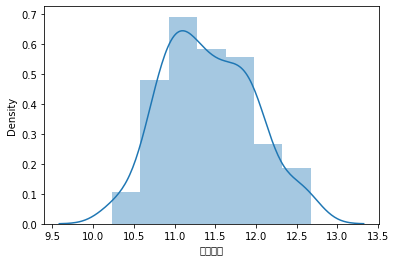

In [ ]:
sns.distplot(서울시립미술관['관광객수'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_te

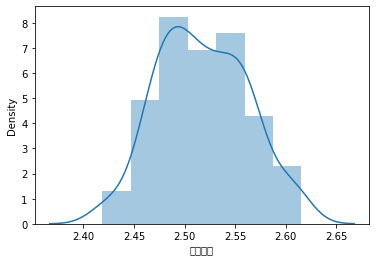

In [ ]:
서울시립미술관_log = 서울시립미술관
서울시립미술관_log['관광객수'] = 서울시립미술관_log['관광객수'].apply(lambda x : np.log1p(x))
sns.distplot(서울시립미술관_log['관광객수'])

In [ ]:
data

,date,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,month,season,봄,여름,가을,겨울
0,201101,-7.183871,-10.522581,966.290323,-3.406452,1392.838710,4.988750,1.112500,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2.796774,2415.387097,229.354839,-15.341935,35.129032,1230.322581,53.829032,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,7.048387,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,141183,11486,17644,43677,72313,92135,234587,260272,1747,34551,18407,10128.0,736,13486.0,1,4,0,0,0,1
1,201102,1.221429,-2.460714,706.785714,5.864286,1441.535714,12.330000,9.700000,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2.553571,2210.250000,190.357143,-7.639286,32.000000,1390.214286,55.228571,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,5.950000,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,230814,17078,35708,73330,135771,132920,171376,224691,1943,20934,14387,15695.0,1730,18578.0,2,4,0,0,0,1
2,201103,3.616129,-0.119355,1033.548387,8.345161,1464.419355,4.872857,2.085714,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,3.406452,2950.032258,246.451613,-6.654839,25.258065,1398.032258,51.112903,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,7.748387,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,228276,22238,29856,78705,105735,64869,260687,184565,3000,18641,47554,11468.0,2085,22696.0,3,1,1,0,0,0
3,201104,10.720000,6.773333,773.433333,15.596667,1345.500000,7.606364,10.009091,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,3.243333,2805.733333,226.000000,0.300000,28.666667,1245.600000,54.240000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,6.736667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,349368,30470,70101,129150,176991,85548,56024,240861,8029,24078,66009,11577.0,5212,43184.0,4,1,1,0,0,0
4,201105,17.925806,13.570968,953.387097,22.983871,1397.129032,7.137692,4.107692,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2.832258,2446.709677,156.129032,7.900000,32.161290,1296.290323,56.416129,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,5.819355,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,438567,56106,78017,151833,188983,103100,279310,307969,17108,25593,72267,9507.0,6201,44836.0,5,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

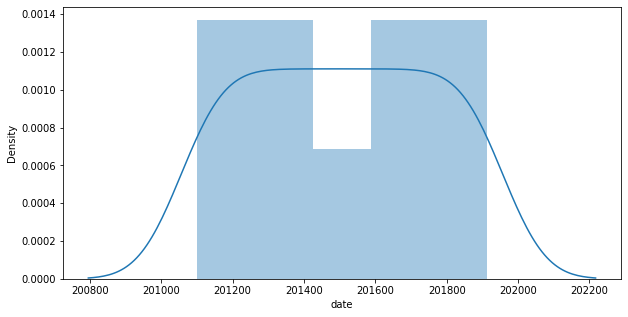

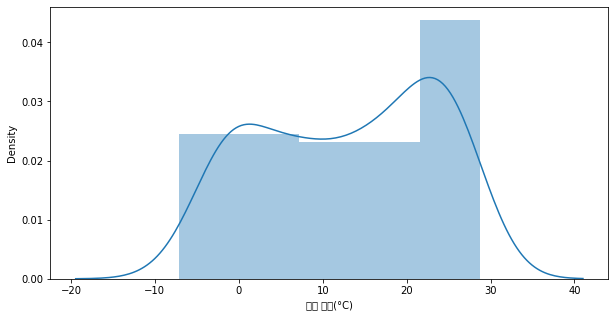

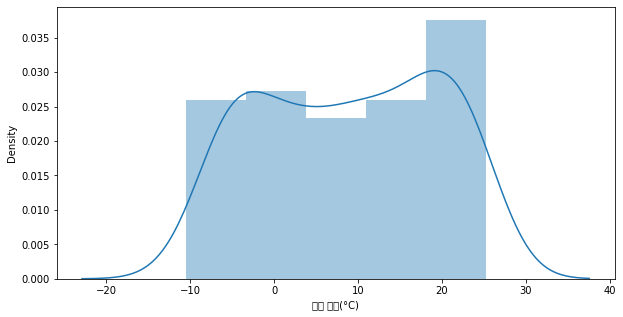

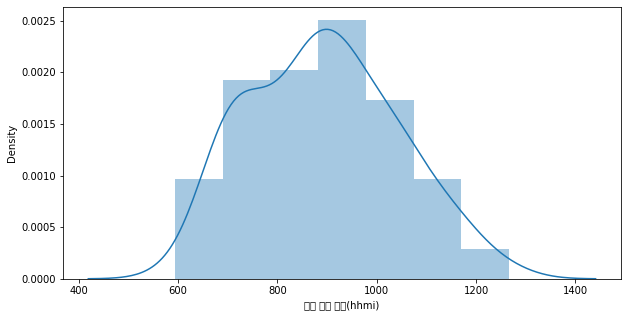

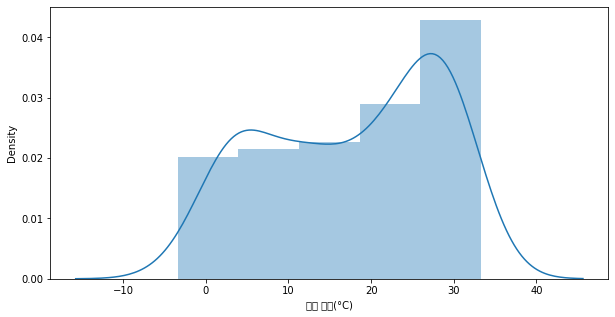

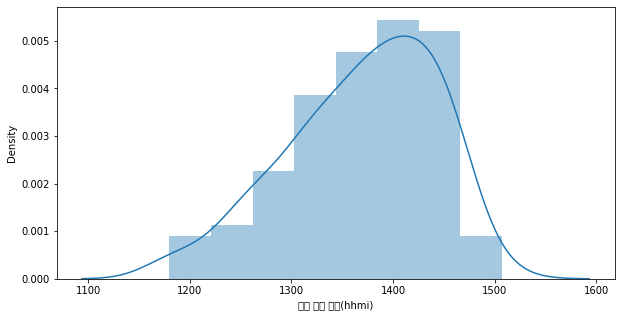

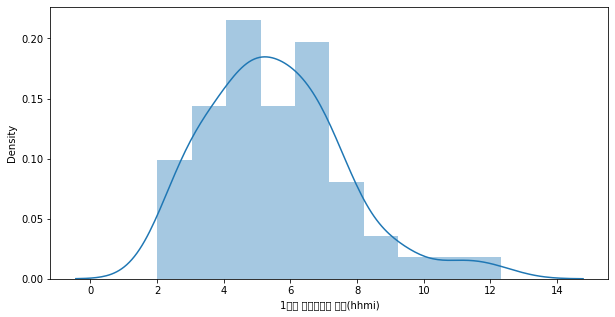

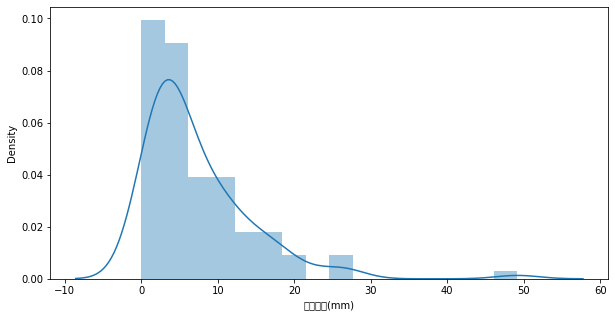

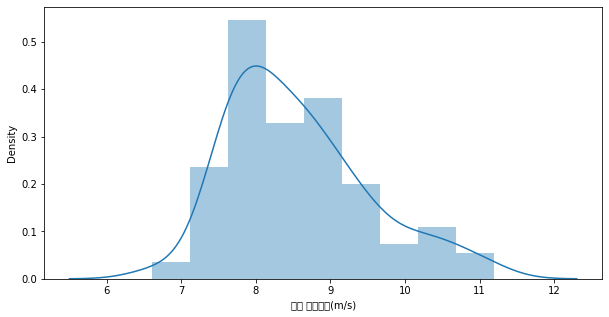

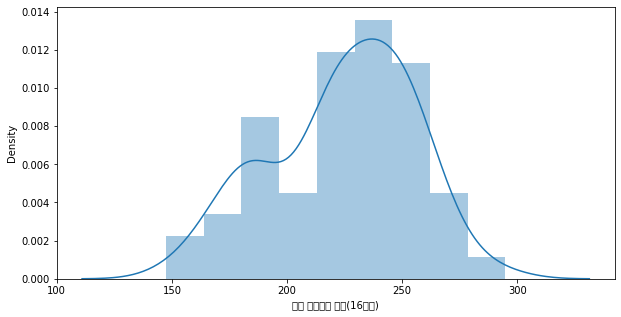

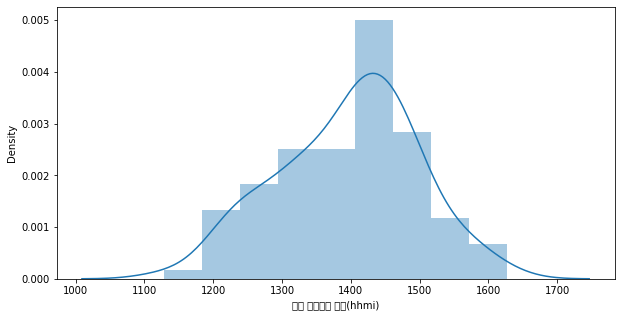

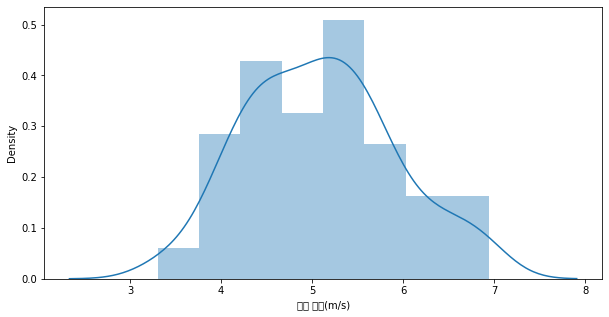

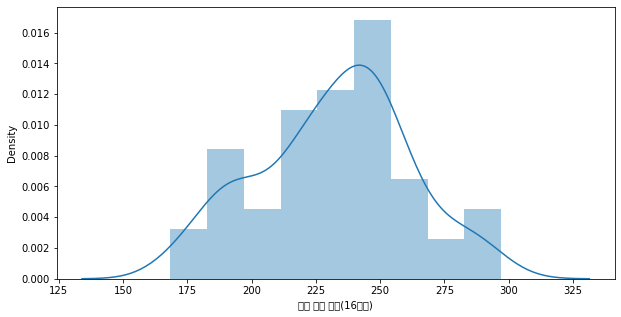

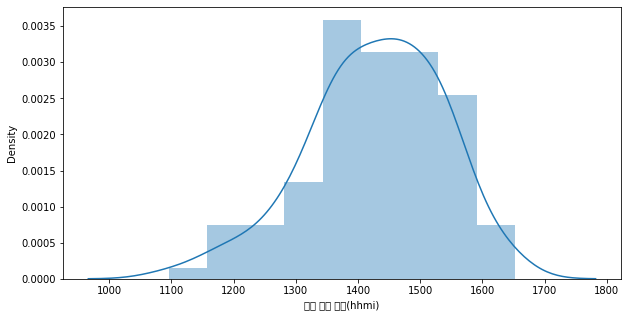

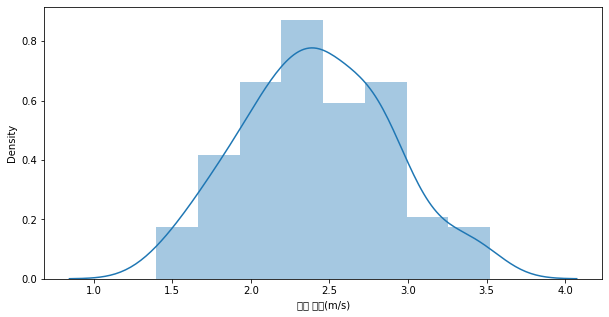

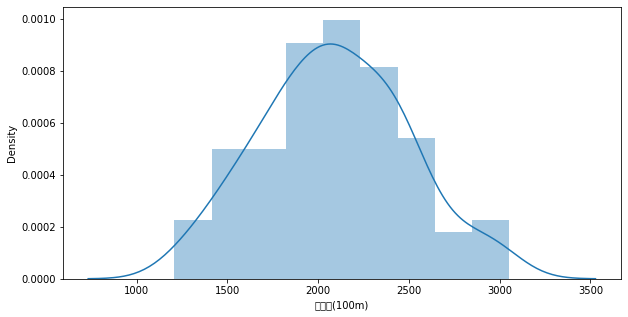

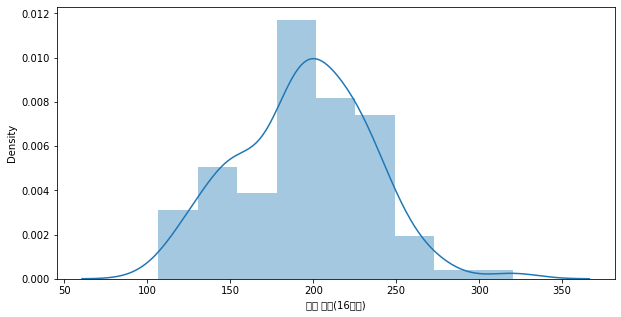

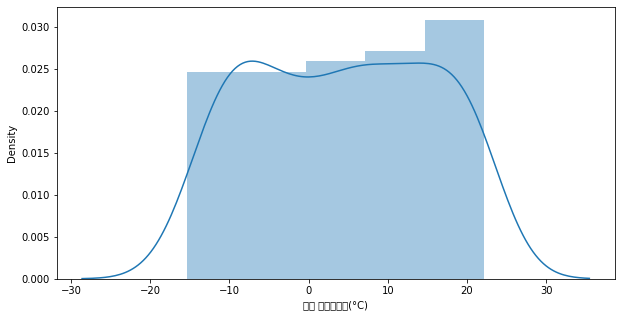

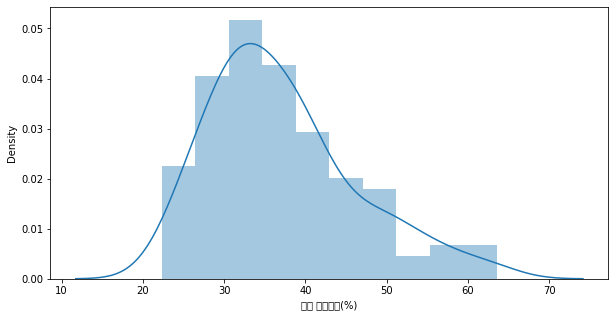

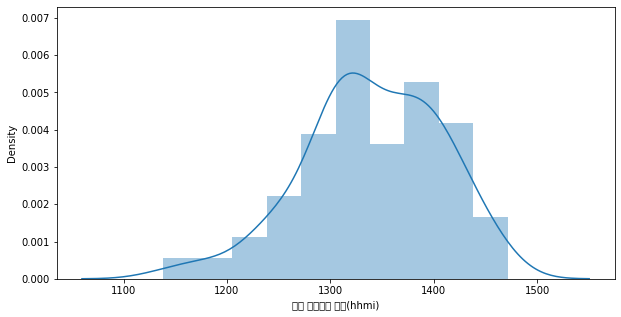

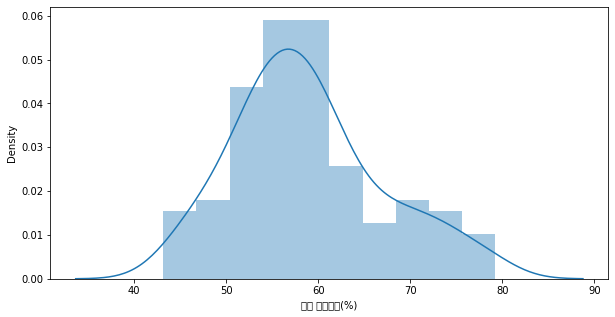

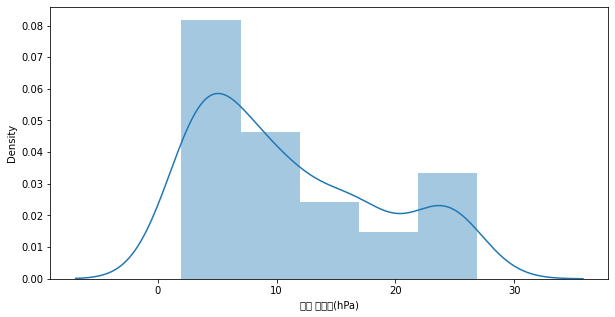

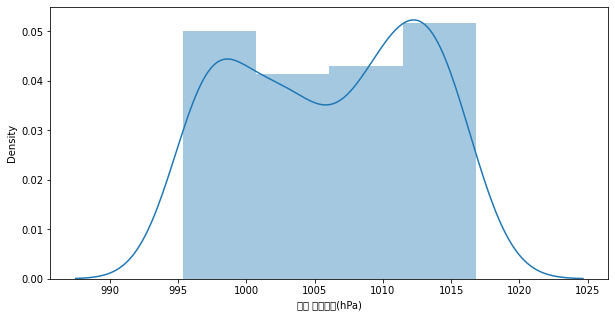

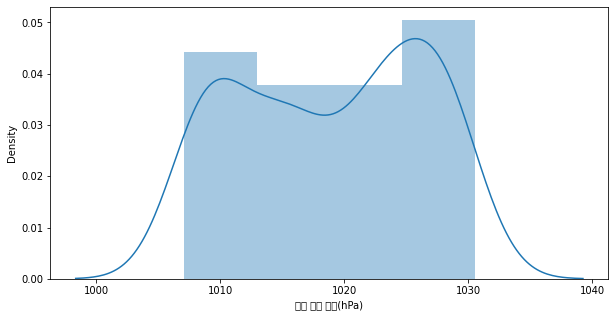

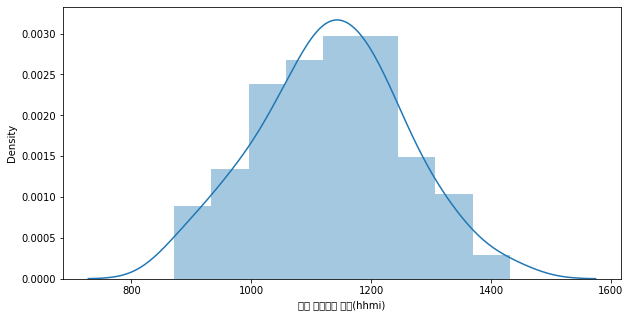

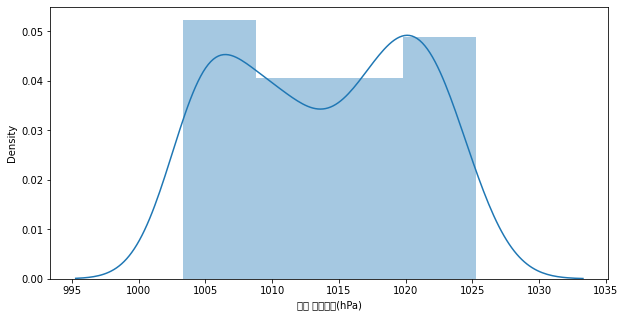

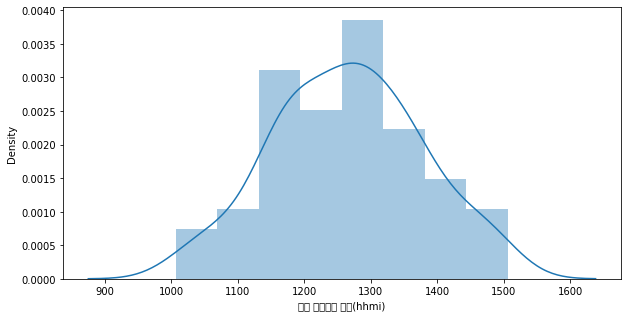

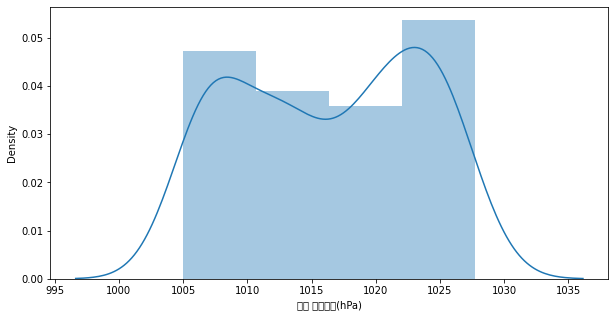

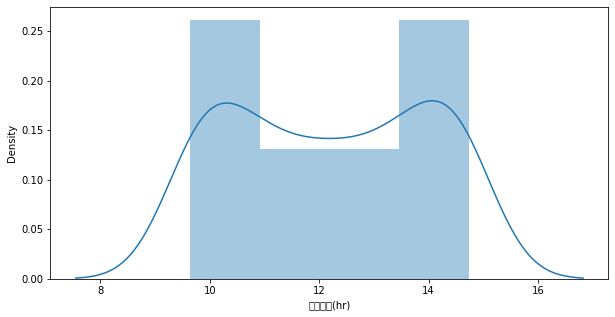

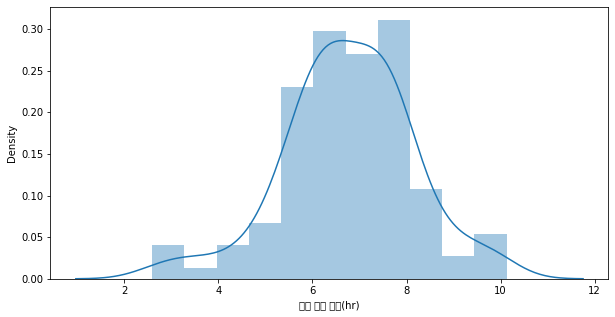

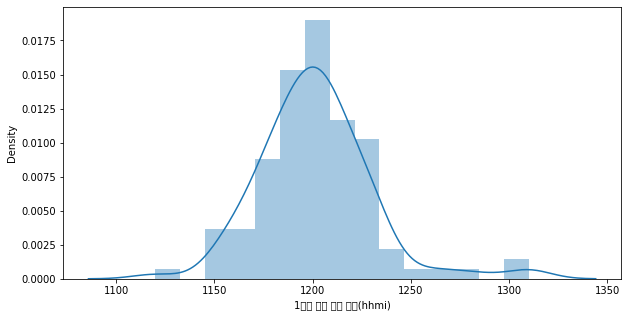

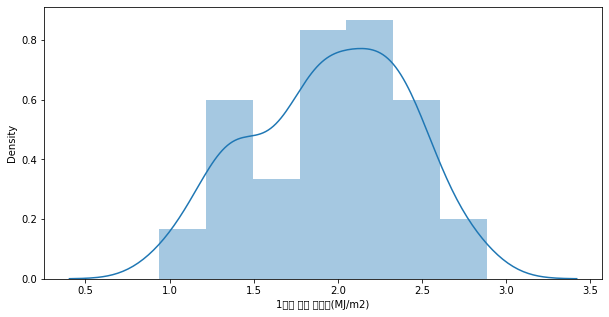

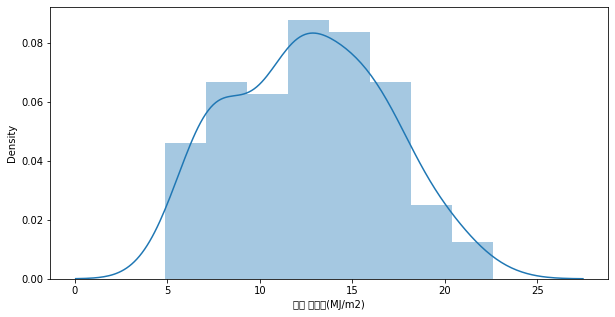

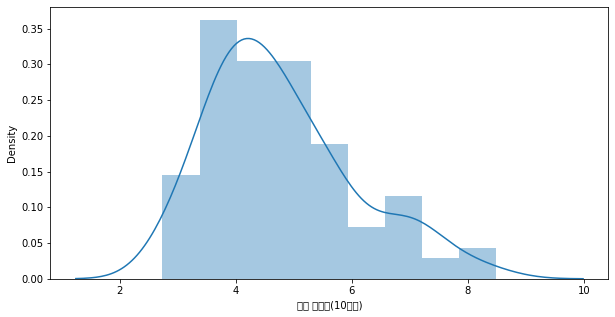

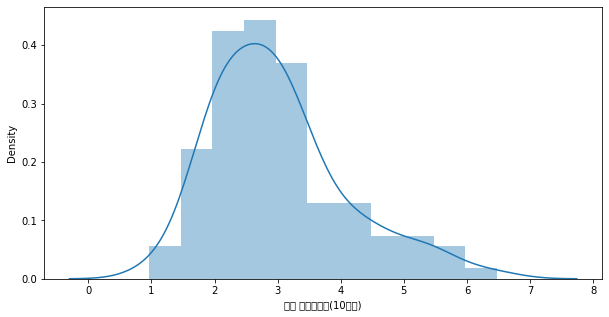

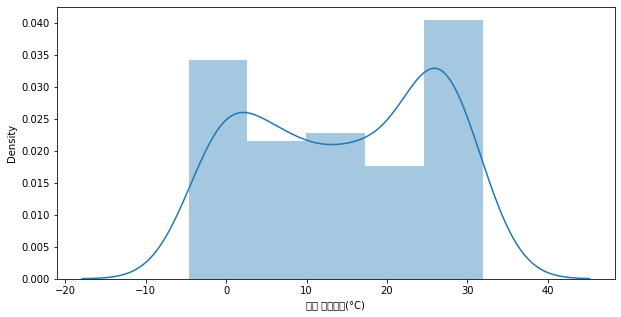

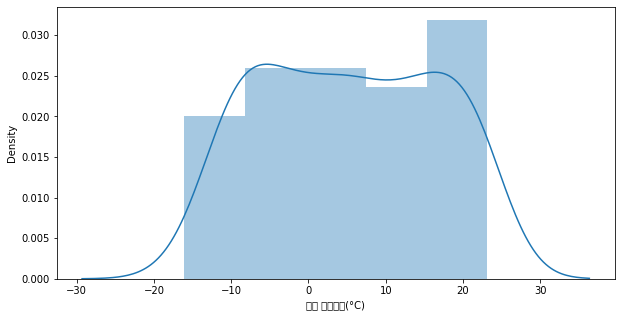

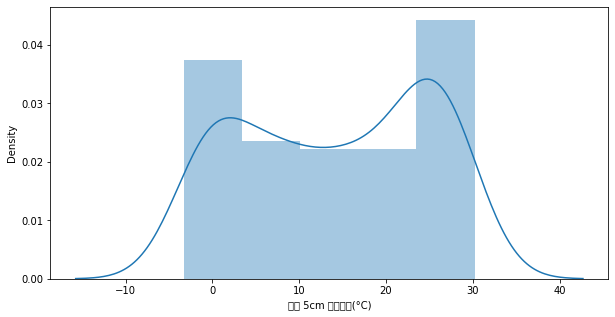

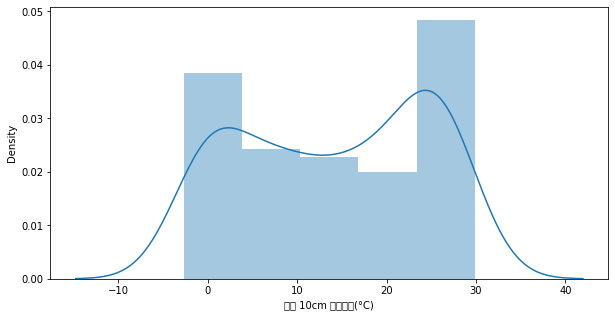

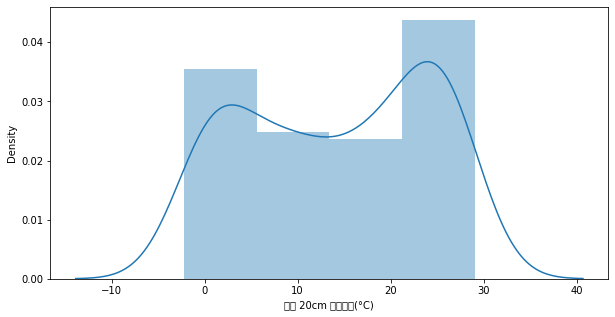

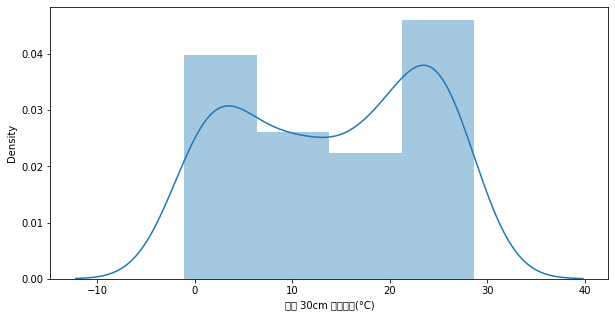

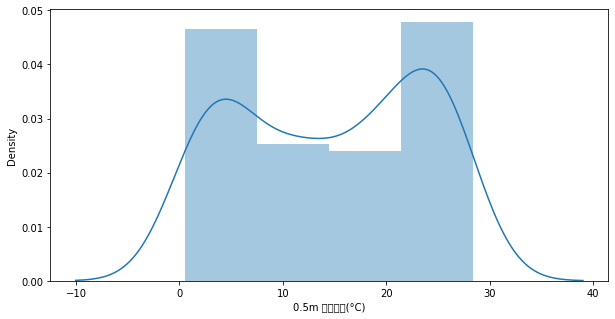

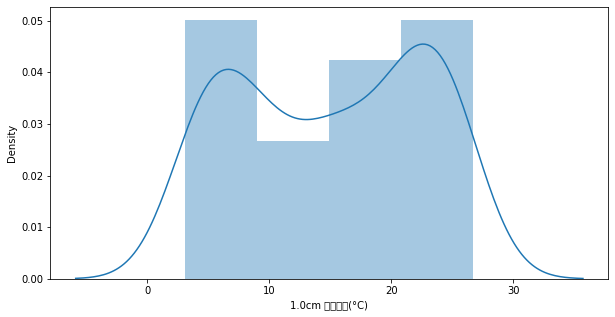

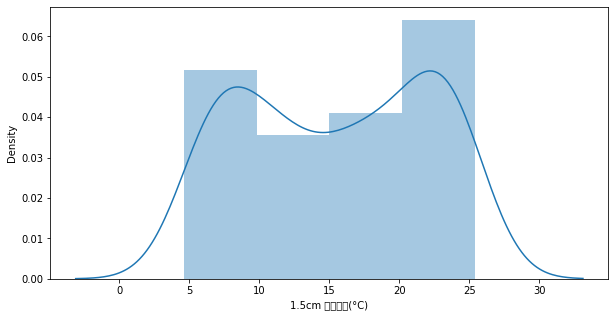

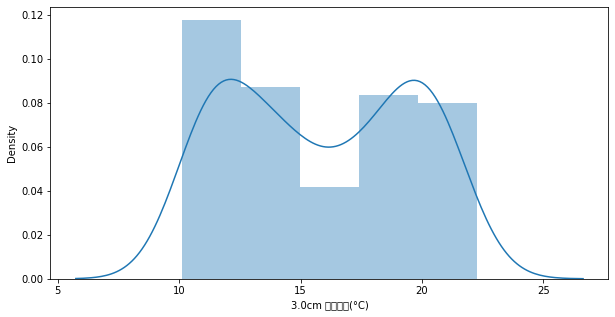

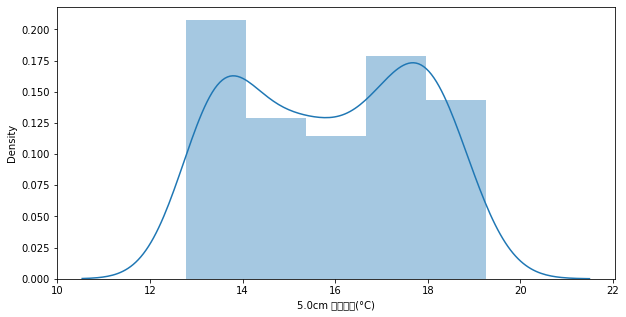

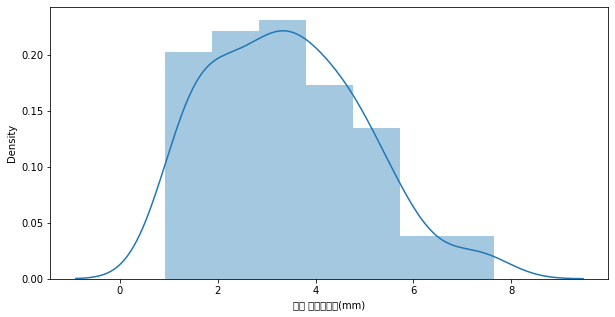

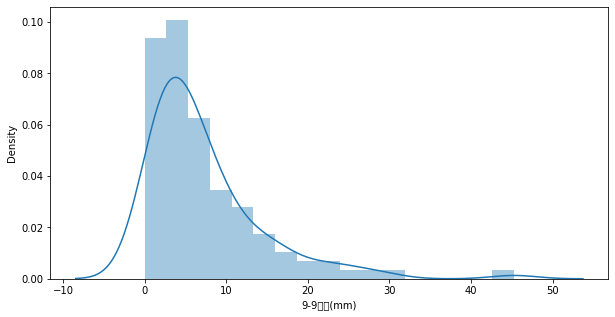

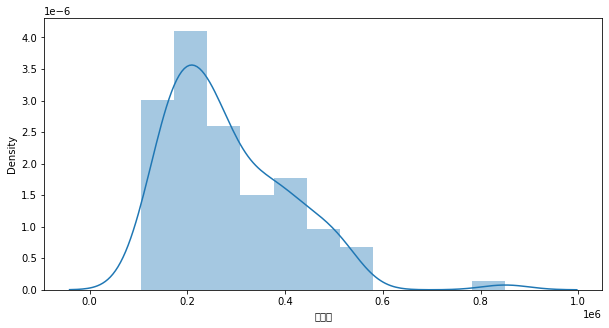

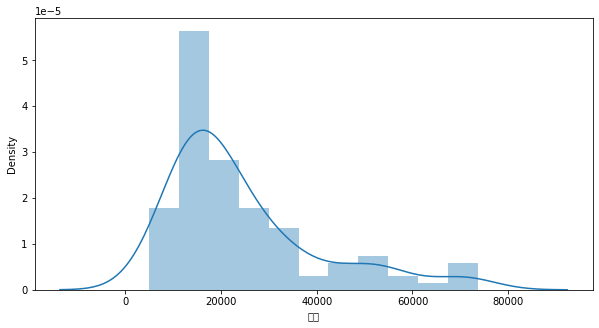

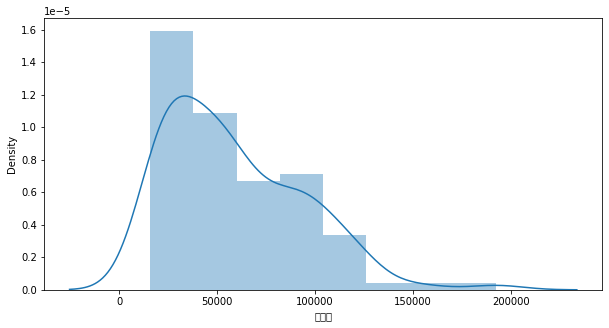

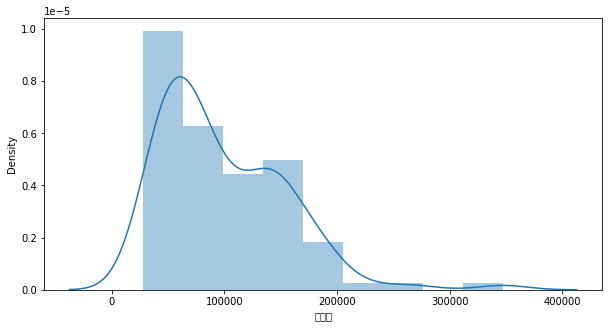

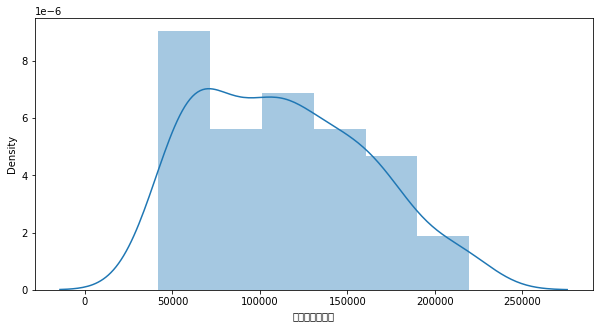

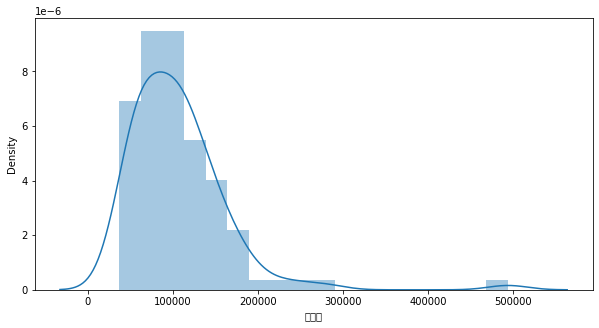

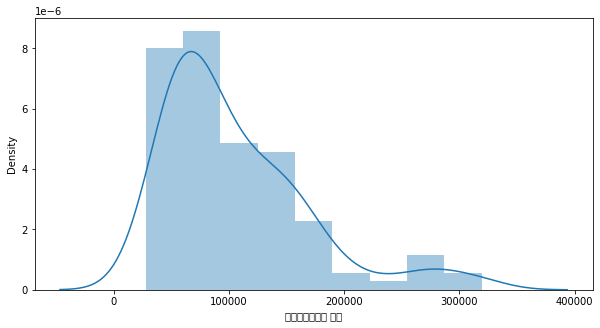

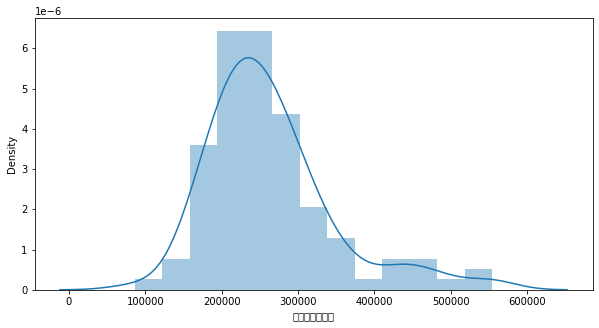

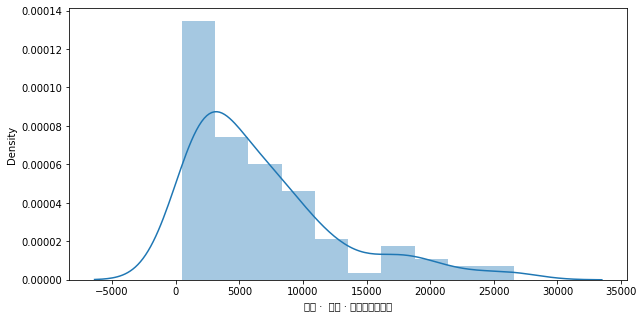

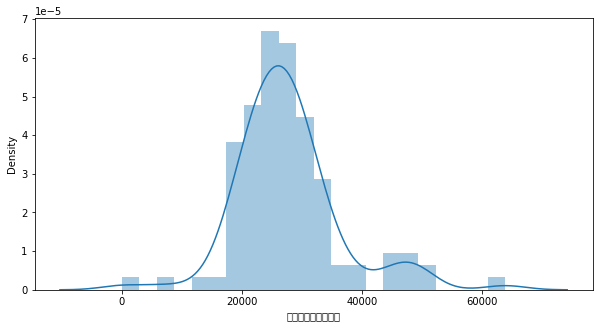

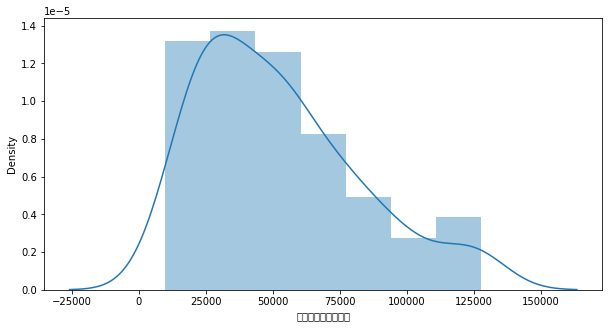

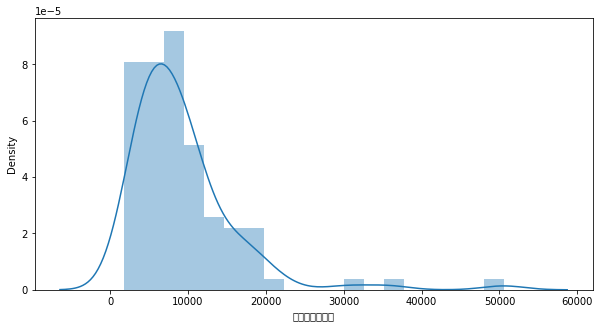

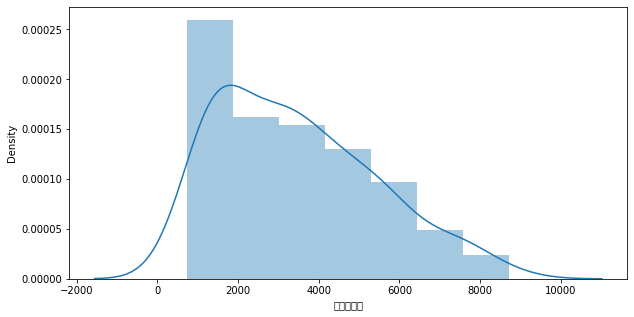

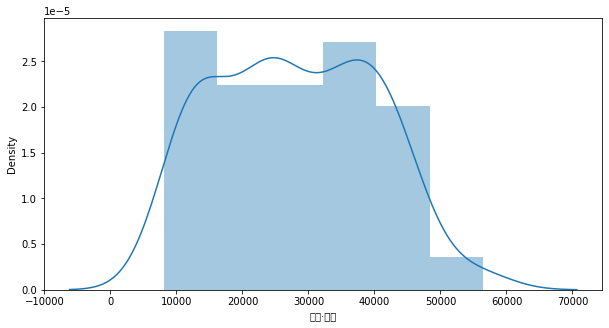

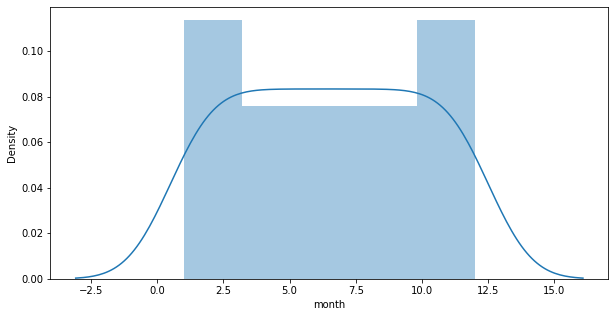

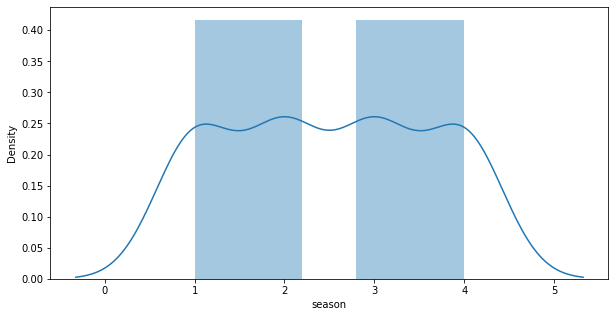

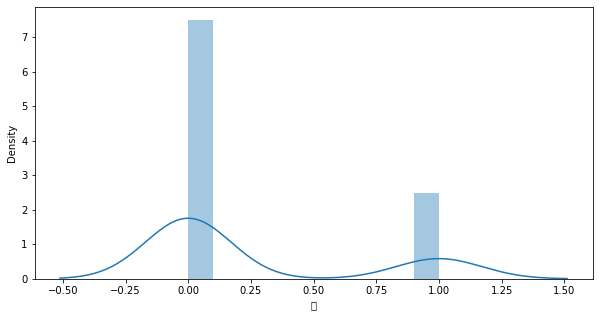

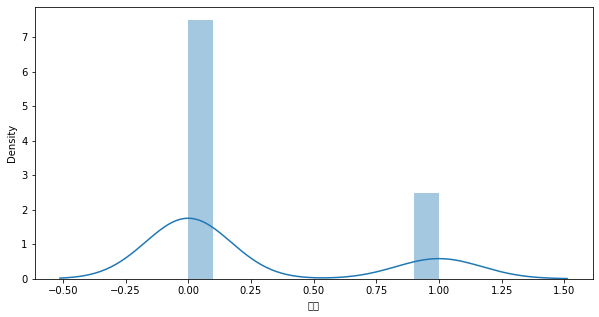

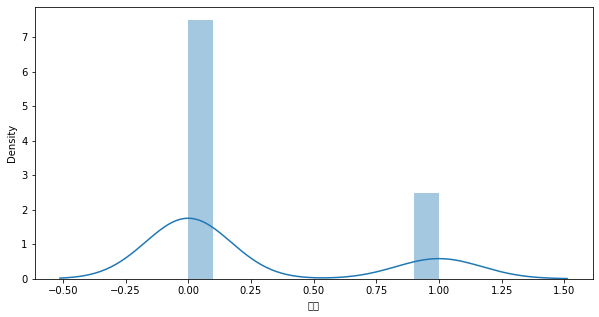

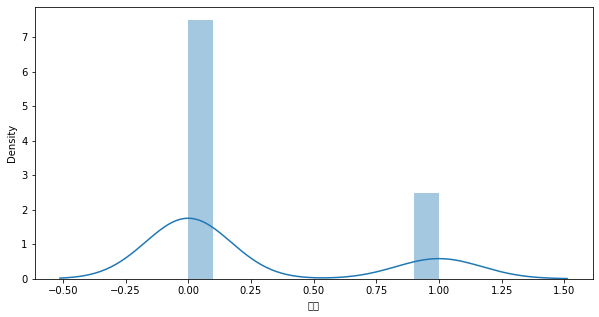

In [ ]:
for i in range(len(data.columns)) :
  fig, ax = plt.subplots(figsize = (10,5))
  sns.distplot(data[data.columns[i]])
  plt.rc('font', family='NanumGothic') 

쓰려고하는 평균기온과 최고기온 분포가 정규분포를 따르지 않는다.

반으로 잘라서 두개의 데이터 프레임을 사용해 보려고 한다.

In [ ]:
data.describe()

,date,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,month,season,봄,여름,가을,겨울
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,106.000000,108.000000,105.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,201506.500000,12.962107,8.935446,894.079425,17.775361,1369.011547,5.566273,7.388632,8.562211,224.002140,1395.527263,5.098249,232.055597,1426.580434,2.418871,2090.061028,194.526074,4.282802,37.141055,1340.290148,58.859200,11.099789,1006.093171,1018.931403,1134.427010,1013.864025,1264.873460,1016.371364,12.196161,6.759642,1201.463116,1.951449,12.660288,4.786531,2.999323,14.775502,5.256739,14.183081,14.158176,14.215053,14.243616,14.633083,15.057532,15.477015,15.872473,15.862126,3.410074,7.291025,283474.351852,24405.962963,58879.481481,99045.777778,113289.962963,106036.601852,105697.018519,263243.768519,6749.833333,27622.777778,52372.259259,9263.320755,3456.601852,28003.742857,6.500000,2.500000,0.250000,0.250000,0.250000,0.250000
std,259.425804,10.419425,10.498987,148.282610,10.476110,73.228177,2.082795,7.275500,0.943749,30.968263,101.033617,0.822790,29.188558,109.752041,0.467710,404.211231,39.124757,11.273877,9.039083,66.916210,8.088644,7.558100,6.655399,7.418118,121.380821,6.831294,112.109603,7.112867,1.771590,1.382704,28.944823,0.454713,4.123344,1.270155,1.072933,11.259470,11.239315,10.613860,10.294397,9.871234,9.470430,9.008111,7.638503,6.560586,3.702995,1.908136,1.552943,7.200280,124626.751440,15902.072968,35009.850542,55864.036831,47538.785210,59314.225222,63231.103224,83460.185757,5836.963640,8774.893962,30267.649236,6927.474192,1946.456920,12037.325429,3.468146,1.123246,0.435031,0.435031,0.435031,0.435031
min,201101.000000,-7.183871,-10.522581,594.000000,-3.406452,1179.966667,2.011667,0.000000,6.613333,147.419355,1127.967742,3.303226,168.333333,1095.322581,1.396667,1209.166667,106.774194,-15.341935,22.354839,1138.366667,43.179310,1.983871,995.338710,1007.074194,870.903226,1003.316129,1006.741935,1005.006452,9.635484,2.593548,1120.000000,0.940000,4.893226,2.738710,0.962069,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,0.560714,3.103571,4.589286,10.096774,12.780645,0.923333,0.000000,105724.000000,5016.000000,15722.000000,28061.000000,41656.000000,36900.000000,27807.000000,86464.000000,486.000000,0.000000,9821.000000,1733.000000,736.000000,8040.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,201303.750000,3.194240,-0.542195,766.056452,7.909764,1321.933929,4.178214,2.695000,7.833118,203.790323,1329.935484,4.502500,214.717742,1358.440591,2.106452,1823.717742,162.803970,-6.069355,30.544624,1302.314516,53.655357,4.241935,999.287903,1011.438710,1049.862903,1006.922581,1183.426075,1009.16

In [ ]:
data1 = data.loc[data['평균 기온(°C)']<= np.mean(data['평균 기온(°C)'])]
data2 = data.loc[data['평균 기온(°C)'] > np.mean(data['평균 기온(°C)'])]

In [ ]:
서울시립미술관1 = 서울시립미술관.loc[서울시립미술관['평균 기온(°C)']<= np.mean(data['평균 기온(°C)'])]
서울시립미술관2 = 서울시립미술관.loc[서울시립미술관['평균 기온(°C)']> np.mean(data['평균 기온(°C)'])]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_te

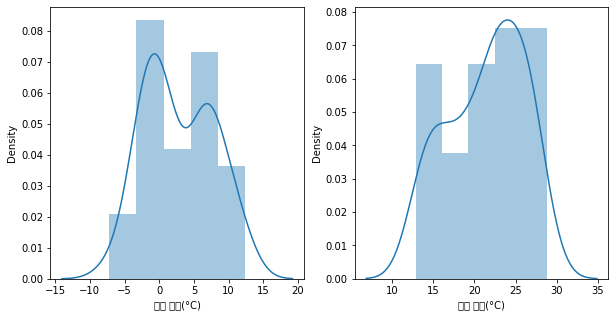

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5), ncols =2)
sns.distplot(서울시립미술관1['평균 기온(°C)'], ax = ax[0])
sns.distplot(서울시립미술관2['평균 기온(°C)'], ax = ax[1])

In [ ]:
for key, regressor in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(서울시립미술관1[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '평균 지면온도(°C)','봄', '여름', '가을', '겨울']], 서울시립미술관1['관광객수'], test_size = 0.2, random_state = 42)
  model = regressor
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
  print('r2 : ', round(r2_score(y_test,y_pred), 4))
  print('-'*100)
a =y_pred
print(a)

[07:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  -27.52 %
rmse :  0.037664852237121106
r2 :  -0.2752
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  -28.68 %
rmse :  0.03783571528758724
r2 :  -0.2868
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  23.94 %
rmse :  0.02908877818354517
r2 :  0.2394
----------------------------------------------------------------------------------------------------
[2.54299888 2.52447959 2.521477   2.52070629 2.51569095 2.47631988
 2.52936381 2.46077797 2.52292946 2.47042857]


In [ ]:
for key, regressor in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(서울시립미술관2[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최소 상대습도(%)', 
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '평균 지면온도(°C)','봄', '여름', '가을', '겨울']], 서울시립미술관2['관광객수'], test_size = 0.2, random_state = 42)
  model = regressor
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))
  print('r2 : ', round(r2_score(y_test,y_pred), 4))
  print('-'*100)
b = y_pred
print(b)

[07:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  -41.91 %
rmse :  0.047812050915220485
r2 :  -0.4191
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  -21.91 %
rmse :  0.04431511414902535
r2 :  -0.2191
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  -15.98 %
rmse :  0.0432232731997965
r2 :  -0.1598
----------------------------------------------------------------------------------------------------
[2.54788548 2.55144149 2.53692732 2.55469996 2.48796974 2.53005811
 2.51860939 2.5006402  2.52305482 2.4988532  2.55310239 2.52383796]


좋은결과는 안나옴..